In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [430]:
df = pd.read_csv('Social_Network_Ads.csv')

In [431]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [432]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [434]:
df.shape

(400, 5)

In [435]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

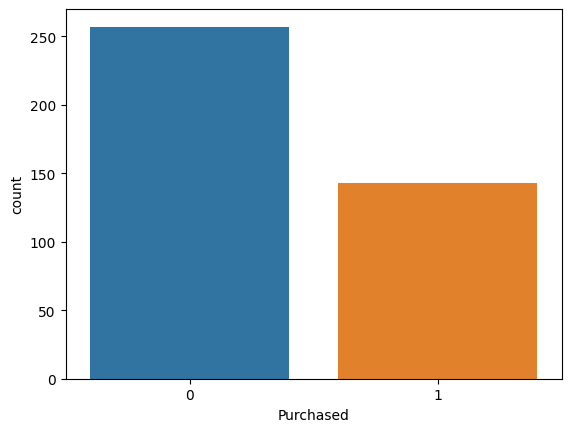

In [436]:
sns.countplot(x= 'Purchased', data = df)

<AxesSubplot:>

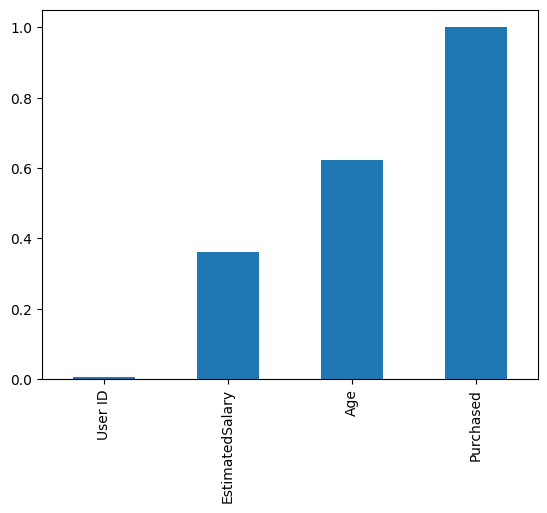

In [437]:
df.corr()['Purchased'].sort_values().plot(kind = 'bar')

- Gender degiskenini Kategorik veri tipine donusturecegiz.
- UserID degiskenini silecegiz.

In [438]:
df['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [439]:
df['Gender'] = df.Gender.str.replace('Male', '1')

In [440]:
df['Gender'] = df.Gender.str.replace('Female', '0')

In [441]:
df["Gender"].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: object

In [442]:
df['Gender'] = df['Gender'].astype('int64')

In [443]:
df['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

In [444]:
dfML['Gender'] = df['Gender']

In [445]:
df_Orginal = df

In [446]:
df = dfML

In [447]:
df.corr()['Purchased'].sort_values()

Gender            -0.042469
EstimatedSalary    0.362083
Age                0.622454
Purchased          1.000000
Name: Purchased, dtype: float64

<AxesSubplot:>

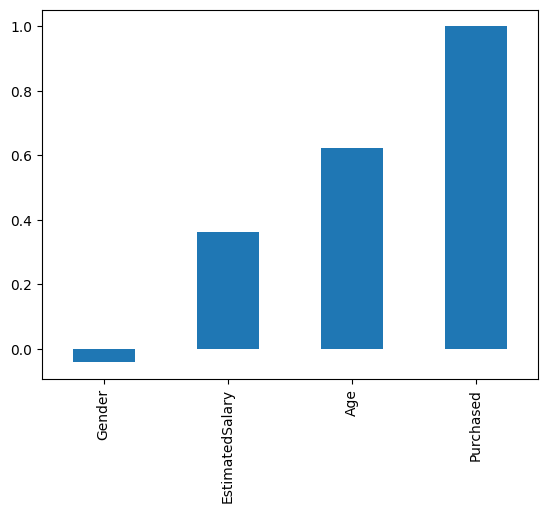

In [448]:
df.corr()['Purchased'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

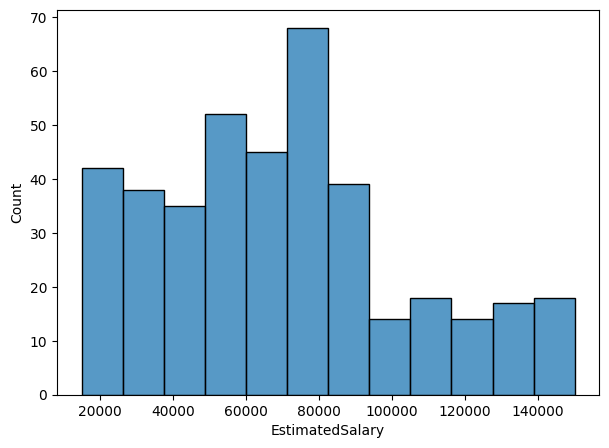

In [449]:
plt.figure(figsize=(7,5))
sns.histplot(df['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

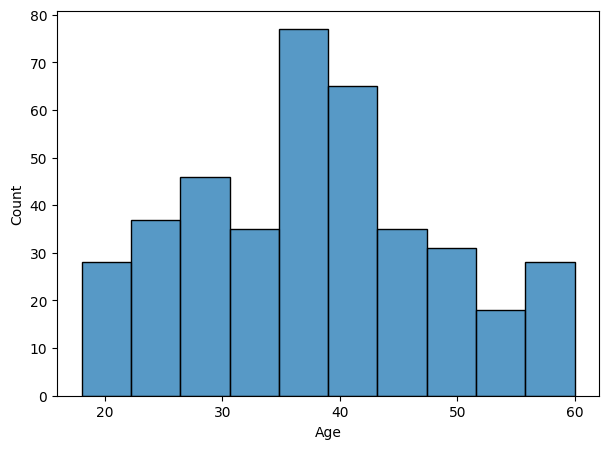

In [450]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

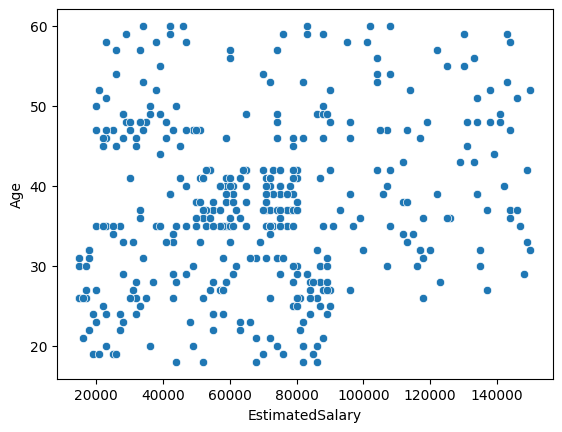

In [451]:
sns.scatterplot(x='EstimatedSalary', y='Age', data=df)

In [452]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


- Gender -> Cinsiyet
- Age -> Yas
- EstimatedSalary -> Tahmini Maas
- Purchased -> Satin alma durumu. 1 alindi, 0 alinmadi.

## Veriyi Test/Train olarak ikiye bolme

Bagimli degiskenimizi Purshased seciyoruz. Yani diger degiskenlerinin durumuna gore satin alma durumunu tahmin etmeye yonelik bir ML modeli kuracagiz.


In [453]:
from sklearn.model_selection import train_test_split

In [454]:
y = df['Purchased'].values
x = df.drop("Purchased", axis = 1).values

In [455]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=99) 

In [456]:
x_train.shape

(268, 3)

In [457]:
x_test.shape

(132, 3)

## Scaling

In [458]:
from sklearn.preprocessing import MinMaxScaler

In [459]:
scaler = MinMaxScaler()

In [460]:
scaler.fit(x_train)

MinMaxScaler()

In [461]:
x_train = scaler.fit_transform(x_train)

In [462]:
x_test = scaler.fit_transform(x_test)

In [463]:
x_train[:10]

array([[0.        , 0.97619048, 0.18796992],
       [1.        , 0.23809524, 0.31578947],
       [0.        , 0.47619048, 0.36090226],
       [1.        , 0.5       , 0.18796992],
       [0.        , 0.9047619 , 0.65413534],
       [1.        , 0.42857143, 0.12030075],
       [1.        , 0.73809524, 0.08270677],
       [0.        , 0.95238095, 0.04511278],
       [1.        , 0.47619048, 0.33082707],
       [1.        , 0.45238095, 0.27067669]])

In [464]:
x_test[:10]

array([[1.        , 0.16666667, 0.53333333],
       [1.        , 0.5       , 0.45925926],
       [1.        , 0.4047619 , 0.17037037],
       [0.        , 0.33333333, 1.        ],
       [1.        , 0.92857143, 0.43703704],
       [1.        , 0.71428571, 0.13333333],
       [0.        , 0.52380952, 0.94074074],
       [0.        , 0.21428571, 0.31111111],
       [0.        , 0.54761905, 0.42222222],
       [0.        , 0.4047619 , 0.41481481]])

## Modelin Olusturulmasi

In [553]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [554]:
x_train.shape

(268, 3)

In [627]:
model = Sequential()

model.add(Dense(5, activation = 'relu'))

model.add(Dense(5, activation = 'relu'))

model.add(Dense(4, activation = 'relu'))

model.add(Dense(4, activation = 'relu'))

model.add(Dense(5, activation = 'relu'))





model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [628]:
model.fit(x = x_train, y = y_train, epochs = 90, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/90
9/9 [==============================] - 2s 32ms/step - loss: 0.6900 - val_loss: 0.6851
Epoch 2/90
9/9 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.6798
Epoch 3/90
9/9 [==============================] - 0s 9ms/step - loss: 0.6820 - val_loss: 0.6756
Epoch 4/90
9/9 [==============================] - 0s 8ms/step - loss: 0.6787 - val_loss: 0.6712
Epoch 5/90
9/9 [==============================] - 0s 9ms/step - loss: 0.6755 - val_loss: 0.6669
Epoch 6/90
9/9 [==============================] - 0s 7ms/step - loss: 0.6720 - val_loss: 0.6619
Epoch 7/90
9/9 [==============================] - 0s 10ms/step - loss: 0.6686 - val_loss: 0.6569
Epoch 8/90
9/9 [==============================] - 0s 8ms/step - loss: 0.6650 - val_loss: 0.6517
Epoch 9/90
9/9 [==============================] - 0s 9ms/step - loss: 0.6614 - val_loss: 0.6466
Epoch 10/90
9/9 [==============================] - 0s 9ms/step - loss: 0.6575 - val_loss: 0.6420
Epoch 11/90
9/9 [====================

9/9 [==============================] - 0s 11ms/step - loss: 0.2534 - val_loss: 0.2061
Epoch 86/90
9/9 [==============================] - 0s 10ms/step - loss: 0.2487 - val_loss: 0.2138
Epoch 87/90
9/9 [==============================] - 0s 8ms/step - loss: 0.2483 - val_loss: 0.2180
Epoch 88/90
9/9 [==============================] - 0s 8ms/step - loss: 0.2477 - val_loss: 0.2103
Epoch 89/90
9/9 [==============================] - 0s 7ms/step - loss: 0.2470 - val_loss: 0.2105
Epoch 90/90
9/9 [==============================] - 0s 10ms/step - loss: 0.2468 - val_loss: 0.2104


In [629]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

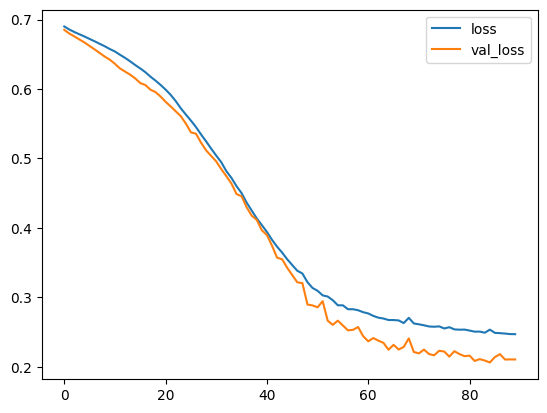

In [630]:
modelKaybi.plot()

In [631]:
tahminlerimiz = (model.predict(x_test) > 0.5) .astype('int32')

5/5 [==============================] - 0s 4ms/step


In [632]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [633]:
print(classification_report(y_test, tahminlerimiz))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        92
           1       0.85      0.88      0.86        40

    accuracy                           0.92       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.92      0.92      0.92       132



In [634]:
print(confusion_matrix(y_test, tahminlerimiz))

[[86  6]
 [ 5 35]]


In [635]:
dogruluk = metrics.accuracy_score(y_test, tahminlerimiz)

In [636]:
dogruluk

0.9166666666666666

In [637]:
1 - dogruluk

0.08333333333333337

In [638]:
36 / (36 + 7)

0.8372093023255814

In [639]:
36 / (36 + 4)

0.9

- Modelimizin dogruluk orani bu veri seti icin gayet iyi durumda.